<a href="https://colab.research.google.com/github/lompas10/DS-Tinkoff-Challenge-2k17/blob/main/Tinkoff_clients_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://zoogen.org/images/rus/images/logo/tinkoff.jpg' width=1050 height = 500 >


---


<p align="center">
<font size=11>
<font face='Cooper black' color='Pink'>Pet-project. Prediction of the client's choice of Tinkoff bank for obtaining a loan</p>


---





<font color='yellow' size = 6>Target: To classify clients according to the choice of Tinkoff Bank clients for obtaining a loan.





---
<font size=6 color = 'violet' face='Cooper black'> Author: Pavel Lomovtsev, Junior Data Scientist, *@lompas10*
---






---



In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA 
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, plot_roc_curve, accuracy_score, recall_score, f1_score, precision_score, plot_precision_recall_curve

#!pip install catboost
from catboost import CatBoostClassifier

import tensorflow as tf

import xgboost

from scipy.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('credit_train.csv', sep='\t', encoding='windows-1251', decimal=',')
test = pd.read_csv('credit_test.csv', sep='\t', encoding='windows-1251', decimal=',')

In [ ]:
train.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,living_region_code,open_account_flg
0,1,M,48,MAR,UMN,59998.00,10,1.6,0.770249,GRD,КРАСНОДАРСКИЙ КРАЙ,30000,1,1,23,0
1,2,F,28,MAR,UMN,10889.00,6,1.1,0.248514,GRD,МОСКВА,43000,2,0,77,0
2,3,M,32,MAR,SPC,10728.00,12,1.1,0.459589,SCH,ОБЛ САРАТОВСКАЯ,23000,5,0,64,0
3,4,F,27,DIV,SPC,12009.09,12,1.1,0.362536,GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000,2,0,34,0
4,5,M,45,MAR,SPC,16908.89,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000,1,0,74,0


In [ ]:
train.dtypes

client_id                 int64
gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum              float64
credit_month              int64
tariff_id                object
score_shk               float64
education                object
living_region            object
monthly_income            int64
credit_count             object
overdue_credit_count     object
living_region_code        int64
open_account_flg          int64
dtype: object

In [ ]:
train = train.drop(['living_region', 'client_id'], axis=1)

In [ ]:
def unique_object_values(data):
  for column in data.select_dtypes(include=['object']).columns:
    print(column, data[column].unique(), end='\n\n')

unique_object_values(train)

gender ['M' 'F']

marital_status ['MAR' 'DIV' 'UNM' 'WID' 'CIV']

job_position ['UMN' 'SPC' 'INP' 'DIR' 'ATP' 'PNA' 'BIS' 'WOI' 'NOR' 'WRK' 'WRP' 'PNV'
 'BIU' 'PNI' 'HSK' 'PNS' 'INV' 'ONB']

tariff_id ['1.6' '1.1' '1.5' '1' '1.32' '1.4' '1.7' '1.3' '1.16' '1.9' '1.22' '1.23'
 '1.43' '1.44' '1.19' '1.2' '1.21' '1.24' '1.91' '1.41' '1.17' '1.94'
 '1.25' '1.48' '1.52' '1.18' '1.26' '1.27' '1.28' '1.96' '1.56' '1.29']

education ['GRD' 'SCH' 'UGR' 'PGR' 'ACD']

credit_count ['1' '2' '5' '0' '3' '7' '4' '6' '?' '8' '10' '9' '12' '11' '14' '15' '13'
 '16' '19' '17' '18' '21']

overdue_credit_count ['1' '0' '?' '2' '3']



In [ ]:
train = train.drop(train[train.credit_count == '?'].index)
train = train.drop(train[train.overdue_credit_count == '?'].index)

In [ ]:
unique_object_values(train)

gender ['M' 'F']

marital_status ['MAR' 'DIV' 'UNM' 'WID' 'CIV']

job_position ['UMN' 'SPC' 'INP' 'DIR' 'ATP' 'PNA' 'BIS' 'WOI' 'NOR' 'WRK' 'WRP' 'PNV'
 'BIU' 'PNI' 'HSK' 'PNS' 'INV']

tariff_id ['1.6' '1.1' '1.5' '1' '1.32' '1.4' '1.7' '1.3' '1.16' '1.9' '1.23' '1.43'
 '1.44' '1.19' '1.2' '1.21' '1.22' '1.24' '1.91' '1.41' '1.17' '1.94'
 '1.25' '1.48' '1.52' '1.18' '1.26' '1.27' '1.28' '1.96' '1.56' '1.29']

education ['GRD' 'SCH' 'UGR' 'PGR' 'ACD']

credit_count ['1' '2' '5' '0' '3' '7' '4' '6' '8' '10' '9' '12' '11' '14' '15' '13'
 '16' '19' '17' '18' '21']

overdue_credit_count ['1' '0' '2' '3']



In [ ]:
X, y = train.drop('open_account_flg', axis=1), train['open_account_flg']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y)

y_train.value_counts()

0    94436
1    18625
Name: open_account_flg, dtype: int64

In [ ]:
X_train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code
124437,M,26,MAR,SPC,9891.00,6,1.9,0.322769,GRD,40000,3,0,23
29962,F,27,UNM,SPC,21266.00,12,1.5,0.627714,GRD,20000,1,0,33
148098,F,25,UNM,UMN,18131.82,12,1.1,0.489713,GRD,25000,0,0,74
109063,M,28,UNM,SPC,11137.00,12,1.4,0.396144,UGR,30000,1,0,63
76854,M,48,MAR,SPC,10477.00,10,1.3,0.471923,SCH,65000,2,0,11


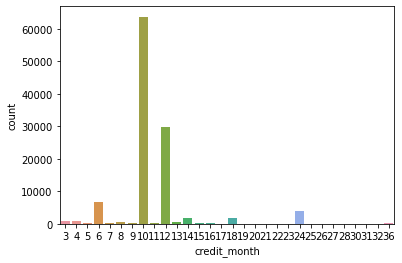

In [ ]:
sns.countplot(X_train['credit_month']);

In [ ]:
X_train.credit_month.value_counts().head()

10    63738
12    29757
6      6865
24     3952
18     1926
Name: credit_month, dtype: int64

In [ ]:
X_train.isna().sum(), X_valid.isna().sum()

(gender                  0
 age                     0
 marital_status          0
 job_position            0
 credit_sum              0
 credit_month            0
 tariff_id               0
 score_shk               0
 education               0
 monthly_income          0
 credit_count            0
 overdue_credit_count    0
 living_region_code      0
 dtype: int64, gender                  0
 age                     0
 marital_status          0
 job_position            0
 credit_sum              0
 credit_month            0
 tariff_id               0
 score_shk               0
 education               0
 monthly_income          0
 credit_count            0
 overdue_credit_count    0
 living_region_code      0
 dtype: int64)

In [ ]:
def month_sum(sum, month):
  return sum / month

In [ ]:
X_train['month_sum'], X_valid['month_sum'] = month_sum(X_train['credit_sum'], X_train.credit_month), month_sum(X_valid['credit_sum'], X_valid.credit_month)

In [ ]:
X_train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
124437,M,26,MAR,SPC,9891.00,6,1.9,0.322769,GRD,40000,3,0,23,1648.500000
29962,F,27,UNM,SPC,21266.00,12,1.5,0.627714,GRD,20000,1,0,33,1772.166667
148098,F,25,UNM,UMN,18131.82,12,1.1,0.489713,GRD,25000,0,0,74,1510.985000
109063,M,28,UNM,SPC,11137.00,12,1.4,0.396144,UGR,30000,1,0,63,928.083333
76854,M,48,MAR,SPC,10477.00,10,1.3,0.471923,SCH,65000,2,0,11,1047.700000


In [ ]:
X_valid.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
133546,F,42,DIV,SPC,29298.00,10,1.5,0.560988,SCH,30000,0,0,14,2929.800000
28469,F,48,UNM,SPC,13079.00,10,1.1,0.379387,SCH,35000,1,0,23,1307.900000
19951,F,23,UNM,SPC,12008.00,24,1.1,0.392285,SCH,20000,4,0,61,500.333333
127402,F,30,CIV,SPC,5544.44,10,1.5,0.457159,GRD,18000,6,0,64,554.444000
31303,F,27,MAR,SPC,26070.00,10,1.1,0.254198,GRD,25000,2,0,59,2607.000000


In [ ]:
def encoding_categories(data):
  encoder = LabelEncoder()
  categories = data.select_dtypes('object')
  for category in categories:
    data[category] = encoder.fit_transform(data[category])
  return data

In [ ]:
encoding_categories(X_train).head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
124437,1,26,2,12,9891.00,6,27,0.322769,1,40000,13,0,23,1648.500000
29962,0,27,3,12,21266.00,12,22,0.627714,1,20000,1,0,33,1772.166667
148098,0,25,3,13,18131.82,12,1,0.489713,1,25000,0,0,74,1510.985000
109063,1,28,3,12,11137.00,12,17,0.396144,4,30000,1,0,63,928.083333
76854,1,48,2,12,10477.00,10,15,0.471923,3,65000,11,0,11,1047.700000


In [ ]:
encoding_categories(X_valid).head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,monthly_income,credit_count,overdue_credit_count,living_region_code,month_sum
133546,0,42,1,12,29298.00,10,23,0.560988,3,30000,0,0,14,2929.800000
28469,0,48,3,12,13079.00,10,1,0.379387,3,35000,1,0,23,1307.900000
19951,0,23,3,12,12008.00,24,1,0.392285,3,20000,14,0,61,500.333333
127402,0,30,0,12,5544.44,10,23,0.457159,1,18000,16,0,64,554.444000
31303,0,27,2,12,26070.00,10,1,0.254198,1,25000,12,0,59,2607.000000


In [ ]:
pearsonr(X_train.overdue_credit_count, y_train)

(0.026209318093173273, 1.2056378685601838e-18)

In [ ]:
X_train.drop('overdue_credit_count', axis=1, inplace=True), X_valid.drop('overdue_credit_count', axis=1, inplace=True)

(None, None)

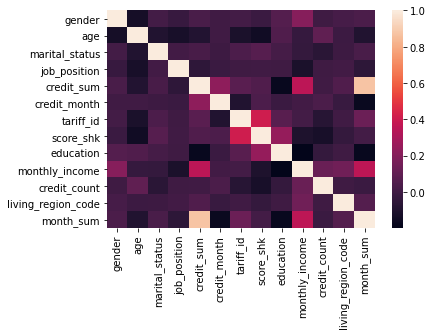

In [ ]:
sns.heatmap(X_train.corr());

In [ ]:
pca = PCA(random_state=17)

params_pca = {'n_components' : np.arange(1, 16)}

best_pca = GridSearchCV(pca, params_pca, cv=5, verbose=1).fit(X_train, y_train).best_estimator_

print(best_pca)

#print(classification_report(y_valid, best_pca.predict(X_valid)))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


PCA(copy=True, iterated_power='auto', n_components=12, random_state=17,
    svd_solver='auto', tol=0.0, whiten=False)


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   17.7s finished


In [ ]:
X_train_reduced = pd.DataFrame(best_pca.fit_transform(X_train))
X_valid_reduced = pd.DataFrame(best_pca.transform(X_valid))

In [ ]:
params_lr = {'C' : [0.0001, 0.001, 0.1, 1]}

lr = LogisticRegression(random_state=17)

lr_best = GridSearchCV(lr, params_lr, scoring='roc_auc', verbose=True, n_jobs=-1, cv=5).fit(X_train_reduced, y_train).best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   17.9s finished


In [ ]:
print(classification_report(y_valid, lr_best.predict(X_valid_reduced)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     40473
           1       0.22      0.10      0.14      7982

    accuracy                           0.80     48455
   macro avg       0.53      0.52      0.51     48455
weighted avg       0.74      0.80      0.76     48455



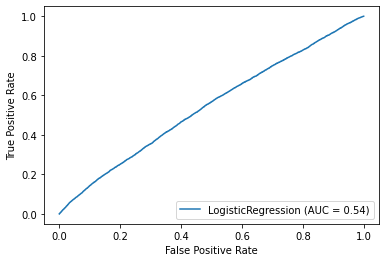

In [ ]:
plot_roc_curve(lr_best, X_valid_reduced, y_valid);

In [ ]:
sgd = SGDClassifier(random_state=17)

sgd_params = {'alpha' : [0.00001, 0.0001, 0.001],
              'max_iter' : [10, 15]}

best_sgd = GridSearchCV(sgd, param_grid=sgd_params, scoring='roc_auc', verbose=1, n_jobs=-1, cv=5).fit(X_train_reduced, y_train).best_estimator_

print(classification_report(y_valid, best_sgd.predict(X_valid_reduced)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.5s finished


              precision    recall  f1-score   support

           0       0.82      0.61      0.70     40473
           1       0.14      0.33      0.20      7982

    accuracy                           0.57     48455
   macro avg       0.48      0.47      0.45     48455
weighted avg       0.71      0.57      0.62     48455



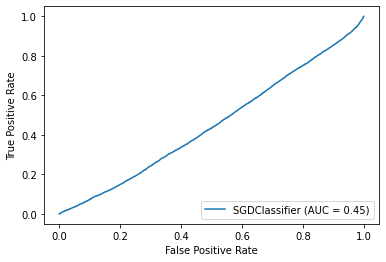

In [ ]:
plot_roc_curve(best_sgd, X_valid_reduced, y_valid);

In [ ]:
rf = RandomForestClassifier(random_state=17)

params_rf = {'n_estimators' : [10, 20, 40, 50, 75, 100],
             'max_depth' : [5, 10, 15]}

best_rf = GridSearchCV(rf, params_rf, verbose=1, n_jobs=-1, cv=5).fit(X_train_reduced, y_train).best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.3min finished


In [ ]:
print(classification_report(y_valid, best_rf.predict(X_valid_reduced)))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91     40473
           1       0.66      0.01      0.02      7982

    accuracy                           0.84     48455
   macro avg       0.75      0.50      0.46     48455
weighted avg       0.81      0.84      0.76     48455



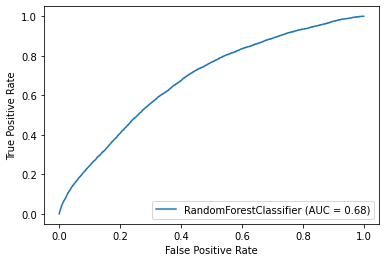

In [ ]:
plot_roc_curve(best_rf, X_valid_reduced, y_valid);

In [ ]:
tree = DecisionTreeClassifier(random_state=17)

params_tree = {'max_depth' : [5, 10, 15],
               'min_samples_leaf' : [5, 10, 20]}

best_tree = GridSearchCV(tree, params_tree, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').fit(X_train_reduced, y_train).best_estimator_

print(classification_report(y_valid, best_tree.predict(X_valid_reduced)))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   47.5s finished


              precision    recall  f1-score   support

           0       0.84      0.99      0.91     40473
           1       0.41      0.04      0.08      7982

    accuracy                           0.83     48455
   macro avg       0.63      0.52      0.49     48455
weighted avg       0.77      0.83      0.77     48455



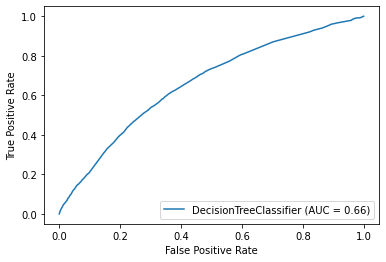

In [ ]:
plot_roc_curve(best_tree, X_valid_reduced, y_valid);

In [ ]:
bag = BaggingClassifier()

params_bag = {'base_estimator' : [lr_best, best_tree, best_sgd],
              'n_estimators' : [10, 25, 50, 100]}

best_bag = GridSearchCV(bag, params_bag, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc').fit(X_train_reduced, y_train).best_estimator_

print(classification_report(y_valid, best_bag.predict(X_valid_reduced)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 25.3min finished


              precision    recall  f1-score   support

           0       0.84      1.00      0.91     40473
           1       0.62      0.01      0.03      7982

    accuracy                           0.84     48455
   macro avg       0.73      0.51      0.47     48455
weighted avg       0.80      0.84      0.77     48455



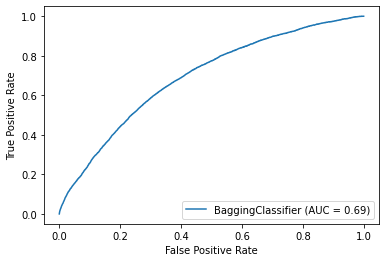

In [ ]:
plot_roc_curve(best_bag, X_valid_reduced, y_valid);

In [ ]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors' : np.arange(10),
              'metric' : ['euclidean', 'minkowski']}

best_knn = GridSearchCV(knn, params_knn, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc').fit(X_train_reduced, y_train).best_estimator_

print(classification_report(y_valid, best_knn.predict(X_valid_reduced)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   40.5s finished


              precision    recall  f1-score   support

           0       0.84      0.99      0.91     40473
           1       0.25      0.02      0.04      7982

    accuracy                           0.83     48455
   macro avg       0.54      0.50      0.47     48455
weighted avg       0.74      0.83      0.76     48455



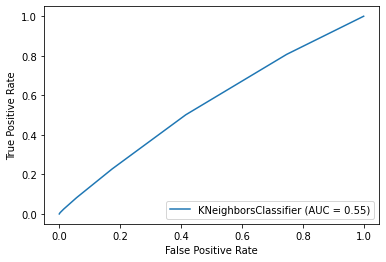

In [ ]:
plot_roc_curve(best_knn, X_valid_reduced, y_valid);

In [ ]:
mlp = MLPClassifier(random_state=17)

params_mlp = {'hidden_layer_sizes' : [(100,), (64, ), (128,)],
              'alpha' : [0.0001, 0.001, 0.01, 0.1]}

best_mlp = GridSearchCV(mlp, params_mlp, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc').fit(X_train_reduced, y_train).best_estimator_

print(classification_report(y_valid, best_mlp.predict(X_valid_reduced)))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 49.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 62.2min finished


              precision    recall  f1-score   support

           0       0.84      1.00      0.91     40473
           1       0.29      0.00      0.00      7982

    accuracy                           0.83     48455
   macro avg       0.56      0.50      0.46     48455
weighted avg       0.75      0.83      0.76     48455



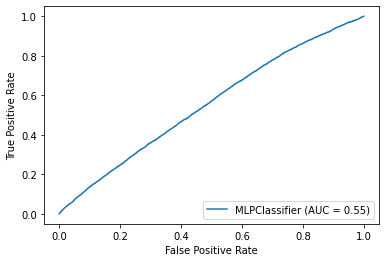

In [ ]:
plot_roc_curve(best_mlp, X_valid_reduced, y_valid)

In [ ]:
cat = CatBoostClassifier()

params_cat = {'iterations' : np.arange(1, 50),
              'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
              'depth' : [5, 7, 9, 11],
              'loss_function' : ['CrossEntropy','F1']}

best_cat = GridSearchCV(cat, params_cat, scoring='roc_auc', n_jobs=-1, cv=5, verbose=1).fit(X_train_reduced, y_train).best_estimator_

print(classification_report(y_valid, best_cat.predict(X_valid_reduced)))

Fitting 5 folds for each of 1568 candidates, totalling 7840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 51.0min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 73.1min
[Parallel(n_jobs=-1)]: Done 7840 out of 7840 | elapsed: 99.3min finished


0:	learn: 0.6500992	total: 180ms	remaining: 8.65s
1:	learn: 0.6150434	total: 300ms	remaining: 7.05s
2:	learn: 0.5856675	total: 418ms	remaining: 6.42s
3:	learn: 0.5609854	total: 536ms	remaining: 6.03s
4:	learn: 0.5404753	total: 658ms	remaining: 5.79s
5:	learn: 0.5224716	total: 779ms	remaining: 5.58s
6:	learn: 0.5076809	total: 894ms	remaining: 5.37s
7:	learn: 0.4950794	total: 1.01s	remaining: 5.18s
8:	learn: 0.4845276	total: 1.13s	remaining: 5.02s
9:	learn: 0.4748573	total: 1.25s	remaining: 4.88s
10:	learn: 0.4667812	total: 1.36s	remaining: 4.71s
11:	learn: 0.4600127	total: 1.48s	remaining: 4.56s
12:	learn: 0.4535195	total: 1.6s	remaining: 4.42s
13:	learn: 0.4479867	total: 1.72s	remaining: 4.29s
14:	learn: 0.4434066	total: 1.84s	remaining: 4.17s
15:	learn: 0.4394087	total: 1.95s	remaining: 4.03s
16:	learn: 0.4361963	total: 2.07s	remaining: 3.9s
17:	learn: 0.4329698	total: 2.18s	remaining: 3.76s
18:	learn: 0.4300914	total: 2.3s	remaining: 3.63s
19:	learn: 0.4281001	total: 2.42s	remaining:

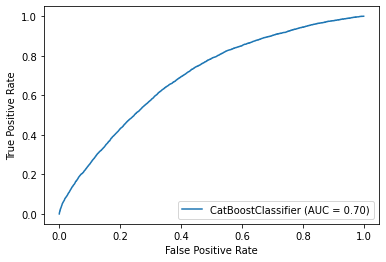

In [ ]:
plot_roc_curve(best_cat, X_valid_reduced, y_valid);

In [ ]:
xgb = xgboost.XGBClassifier()

In [ ]:
s